In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df=pd.read_csv('avocado.csv')
df.head(8)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany


In [10]:
df.shape

(18249, 14)

In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can see from the information above that there are object dtypes, so we have to convert them into integer later.

In [14]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

We will drop unnamed column, as it is just the indexing.

In [16]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
df.shape

(18249, 13)

<AxesSubplot:>

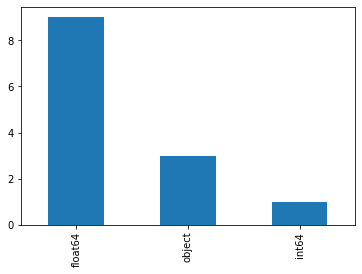

In [18]:
df.dtypes.value_counts().plot(kind='bar')

In [19]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As we can see that there are no missing values, so we can check it through heatmap also and then can proceed further.

<AxesSubplot:>

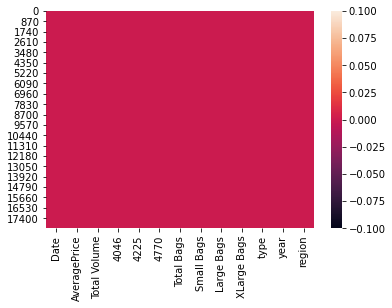

In [20]:
sns.heatmap(df.isnull())

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols]

,Date,type,region
0,2015-12-27,conventional,Albany
1,2015-12-20,conventional,Albany
2,2015-12-13,conventional,Albany
3,2015-12-06,conventional,Albany
4,2015-11-29,conventional,Albany
...,...,...,...
18244,2018-02-04,organic,WestTexNewMexico
18245,2018-01-28,organic,WestTexNewMexico
18246,2018-01-21,organic,WestTexNewMexico
18247,2018-01-14,organic,WestTexNewMexico


We have seen that there are three columns having object type of data, we will seggregate the date columns into date and month.

In [22]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [24]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:xlabel='type', ylabel='count'>

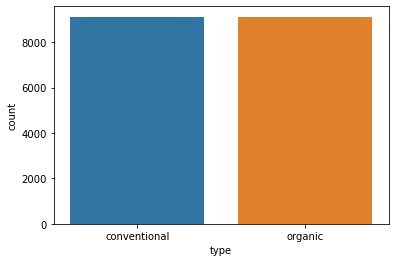

In [25]:
sns.countplot(df.type)

<AxesSubplot:>

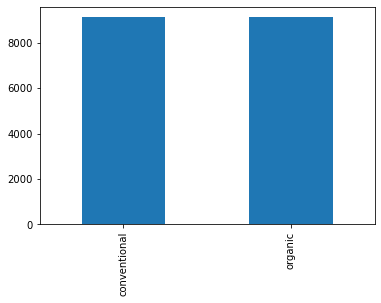

In [26]:
df.type.value_counts().plot(kind='bar')

There is no difference between values of conventional and Organic of type of avocado. So, we will not use SMOTE method,as it is already balanced.

In [28]:
first_column=df.pop('AveragePrice')

In [29]:
df.insert(0, 'AveragePrice', first_column)

In [30]:
df.head()

,AveragePrice,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [33]:
last_column=df.pop('region')

In [35]:
df.insert(14, 'region', last_column)

In [36]:
df.head()

,AveragePrice,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,1.33,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27,Albany
1,1.35,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20,Albany
2,0.93,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13,Albany
3,1.08,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,6,Albany
4,1.28,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,29,Albany


We will drop the date column as we have already taken out Date and month from it.

In [38]:
df.drop(['Date'],axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,6,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,29,Albany


In [39]:
df.shape

(18249, 14)

In [41]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Count of No. of rows in every column are same, it means that there are no missing values in the data set.
Mean and value of median of most of the columns are same and standard deviation are close to each other.
There are Differences b/w max and 75th percentile, it means outliers ae present in some columns,we will remove it later.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

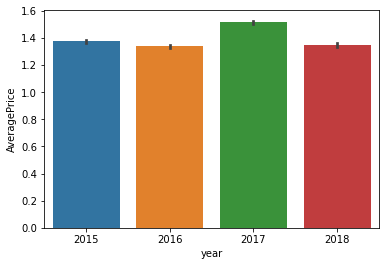

In [42]:
sns.barplot(x='year',y='AveragePrice',data=df)

Price of Avocado is maximum in year 2017 as compared to other years, and as we can see that difference in other years are very less.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

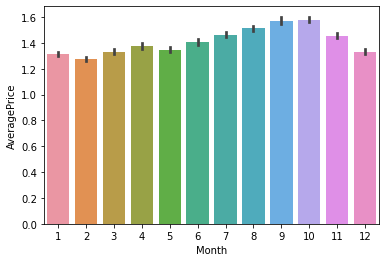

In [43]:
sns.barplot(x='Month',y='AveragePrice',data=df)

Sept. and Oct. are the months where maximum number of avg. price is there, but for whole year the price of Avocado is same. 

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

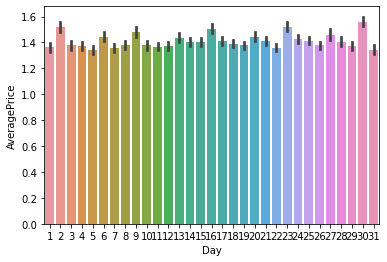

In [44]:
sns.barplot(x='Day',y='AveragePrice',data=df)

In [46]:
import matplotlib.pyplot as plt

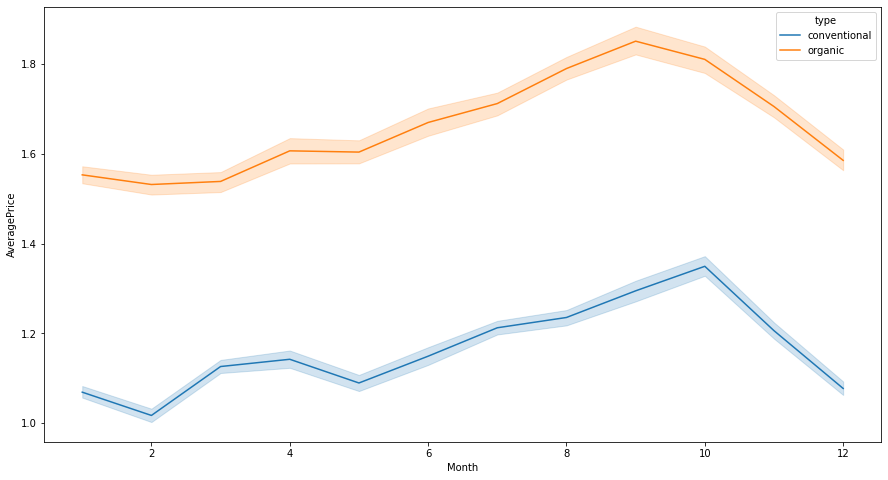

In [52]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)
plt.show()

There is a hike b/w month 8 and 10 of both type of avocados i.e conventional and organic.
Coventional type of Avocado price is less as compared to the organic one.

Now we will use Label Encoder to covert columns type and region into integers.

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['type','region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14,53


In [57]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
Month             int64
Day               int64
region            int64
dtype: object

In [58]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,0.162409,0.027386,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,-0.024689,-0.009747,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,-0.025803,-0.010159,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,-0.022108,-0.012393,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,-0.033424,-0.009009,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,-0.022724,-0.004988,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,-0.023126,-0.003870,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,-0.020187,-0.008352,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,-0.012969,0.000319,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000085,-0.000013,-0.000280


<AxesSubplot:>

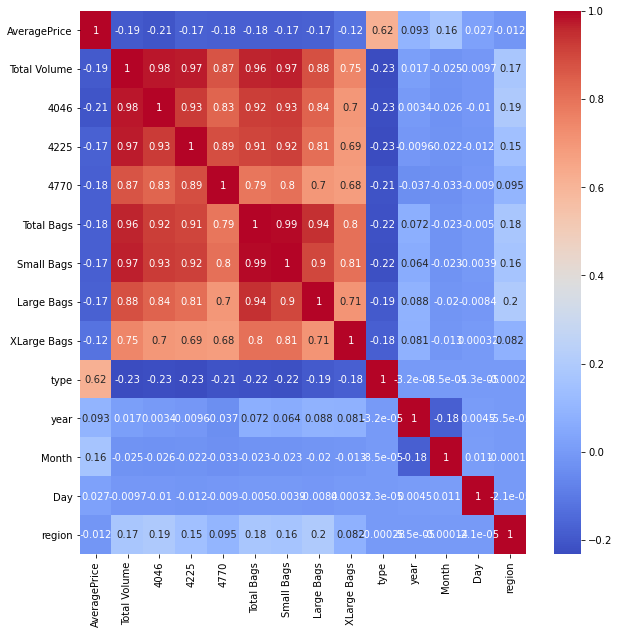

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,annot_kws={'size': 10})

Now we, will see the outliers using box plot and will remove it using Zscore.

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
type               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
year               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.692073,0.125;0.0945122x0.343182)
region             AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

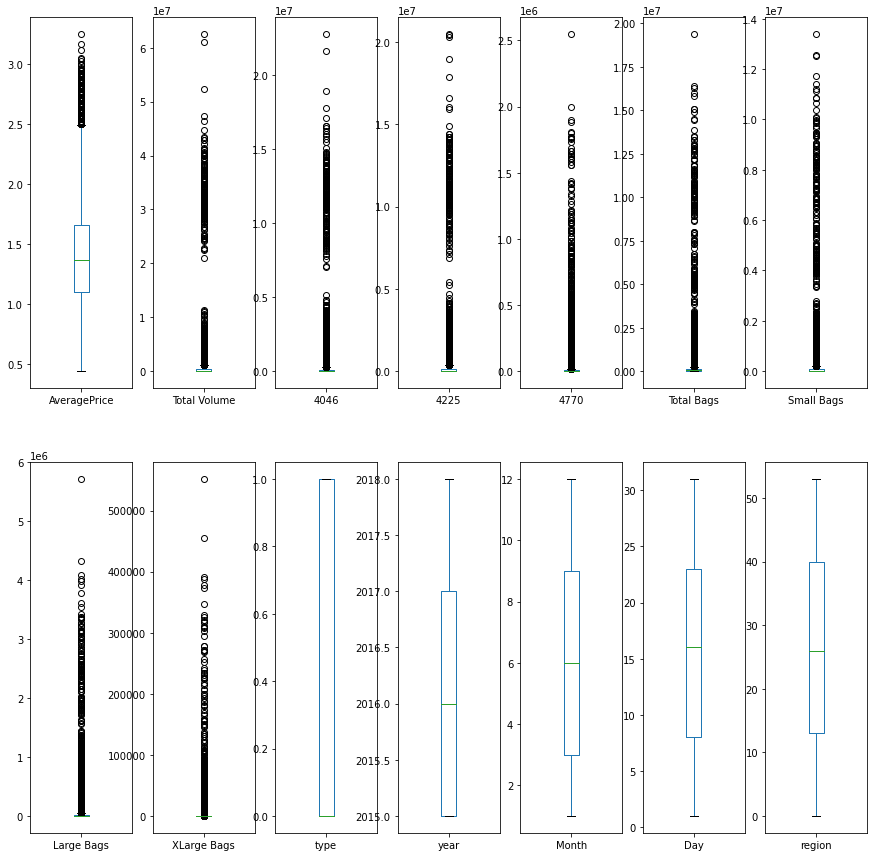

In [66]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(15,15))

# Removing Outliers using Zscore

In [67]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.64763162, 1.29185687,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.64763162, 0.49423066,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.64763162, 0.30339555,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.46495942, 0.60817726,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.46495942, 0.18944895,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.46495942, 0.98707516,
        1.70081131]])

In [68]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([2, 2, 8, ..., 0, 0, 0]))


In [69]:
df_new=df[(z<3).all(axis=1)]

In [70]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,0


In [72]:
df_new.shape

(17651, 14)

In [74]:
df.shape

(18249, 14)

In [75]:
loss_percentage=(18249-17651)/18249*100
print(loss_percentage)

3.276891884486821


Loss of data is very less after removing outliers

In [76]:
df=df_new

Now we will check the skewness in the data

In [77]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
Month           0.107408
Day             0.011778
region          0.012798
dtype: float64

We will see the skewness using histogram graphs.

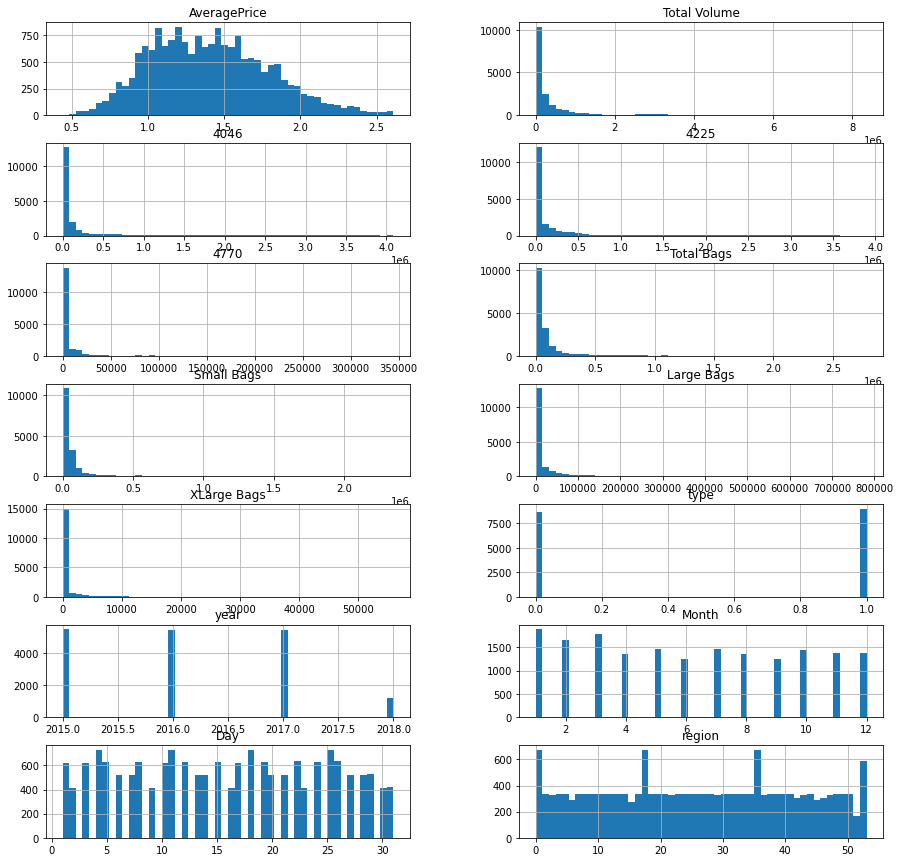

In [80]:
df.hist(bins=50, figsize=(15,15),grid=True, layout=(7,2))
plt.show()

Average price is normally distributed, but rest others are left skewed. So we will try to remove the skewness using power transform.

In [81]:
from sklearn.preprocessing import power_transform

In [83]:
x=df.iloc[:,1:]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14,53


In [84]:
y=df.iloc[:,-14]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [85]:
x=power_transform(x,method='yeo-johnson')
x

array([[-0.07532392, -0.65742071,  0.35142978, ...,  1.49138301,
         1.22756521, -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ...,  1.49138301,
         0.53822879, -2.01058988],
       [ 0.20555556, -0.7317763 ,  0.64933326, ...,  1.49138301,
        -0.21895878, -2.01058988],
       ...,
       [-0.77527399, -0.61796649, -0.77889327, ..., -1.64028838,
         0.64019459,  1.57828237],
       [-0.70179734, -0.54701087, -0.71637127, ..., -1.64028838,
        -0.10529902,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ..., -1.64028838,
        -0.9581001 ,  1.57828237]])

# Scaling of the data

We will use StandardScaler for scaling of data.

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.07532392, -0.65742071,  0.35142978, ...,  1.49138301,
         1.22756521, -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ...,  1.49138301,
         0.53822879, -2.01058988],
       [ 0.20555556, -0.7317763 ,  0.64933326, ...,  1.49138301,
        -0.21895878, -2.01058988],
       ...,
       [-0.77527399, -0.61796649, -0.77889327, ..., -1.64028838,
         0.64019459,  1.57828237],
       [-0.70179734, -0.54701087, -0.71637127, ..., -1.64028838,
        -0.10529902,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ..., -1.64028838,
        -0.9581001 ,  1.57828237]])

# Prediction with Average Price

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings

In [106]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [99]:
x_train.shape

(12355, 13)

In [100]:
x_test.shape

(5296, 13)

In [101]:
y_train.shape

(12355,)

In [102]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5664786327272687

Here in linear regression score is coming out as 56%, we will use other models further to check the predicted score value.

In [103]:
pred=lr.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Predicted result price: [1.06095933 1.1640769  1.76649234 ... 1.53147332 1.30601863 1.67150308]
actual price 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
error:
Mean absolute error: 0.19980789971152546
Mean squared error: 0.06367461305825267
Root Mean Squared Error: 0.25233829090776666


In [104]:
print(r2_score(y_test,pred))

0.5665290505838356


In linear regression r2 score is 0.82, we will try to see it by using other models.

In [107]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5664686267798715

In [108]:
predls=ls.predict(x_test)
print('Predicted result price:',predls)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predls))
print('Mean squared error:',mean_squared_error(y_test,predls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predls)))

Predicted result price: [1.06012572 1.16458779 1.76690919 ... 1.53412807 1.30936635 1.66983796]
actual price 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
error:
Mean absolute error: 0.1998066603455862
Mean squared error: 0.06367250776157123
Root Mean Squared Error: 0.2523341192973539


In [109]:
print(r2_score(y_test,predls))

0.5665433825900699


In lasso r2 score is 0.56, which is same as that of linear regression.

In [110]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5664786327272648

In [111]:
predrd=rd.predict(x_test)
print('Predicted result price:',predrd)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrd)))

Predicted result price: [1.06095932 1.16407691 1.76649234 ... 1.53147336 1.30601872 1.67150304]
actual price 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
error:
Mean absolute error: 0.19980789992444323
Mean squared error: 0.06367461301857266
Root Mean Squared Error: 0.252338290829142


In [112]:
print(r2_score(y_test,predrd))

0.5665290508539611


In ridge r2 score is 0.56, which is same as that of Lasso and linear regression.

In [113]:
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.5664748471800417

In [114]:
predenr=enr.predict(x_test)
print('Predicted result price:',predenr)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predenr))
print('Mean squared error:',mean_squared_error(y_test,predenr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predenr)))

Predicted result price: [1.06043203 1.1643622  1.76673883 ... 1.53308994 1.30821872 1.67041926]
actual price 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
error:
Mean absolute error: 0.19980836954680006
Mean squared error: 0.06367312362569831
Root Mean Squared Error: 0.25233533962903076


In [115]:
print(r2_score(y_test,predenr))

0.566539190036789


In Elasticnet r2 score is 0.56, which is same as that of other three models.

In [136]:
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

model=[svr,dtr,knr,adr,gbr]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('\n')

Predicted result value: [0.78884127 1.04214567 1.5739305  ... 1.69447719 1.87245604 1.82029513]
actual value 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
Mean absolute error: 0.13272894172889949
Mean squared error: 0.03134878740179395
Root Mean Squared Error: 0.17705588779194537
r2_score: 0.7865901654452234


Predicted result value: [0.88 1.2  1.52 ... 1.84 1.66 1.78]
actual value 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
Mean absolute error: 0.12967522658610273
Mean squared error: 0.03921261329305136
Root Mean Squared Error: 0.19802174954547636
r2_score: 0.7330564270932011


Predicted result value: [0.964 1.042 1.316 ... 1.712 1.86  1.594]
actual value 8701     0.56
1227 

Here we can clearly see that best model is KNeighborsRegressor as it has the highest r2 score i.e 78% and lowest Root Mean Squared Error: 0.1767

# Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.55038772  0.35726655  0.28186723  0.29357236  0.03677443  0.23424838
  0.36195551  0.27166733]
0.16087050878283465
0.285088784960649


In [123]:
score=cross_val_score(ls,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.54997076  0.35732513  0.28237727  0.29354673  0.03762354  0.23403286
  0.3613937   0.27104803]
0.1609220613531643
0.28485692699526505


In [124]:
score=cross_val_score(rd,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.55038775  0.35726654  0.28186723  0.29357236  0.0367745   0.23424839
  0.3619555   0.27166733]
0.1608705123632359
0.285088789549718


In [125]:
score=cross_val_score(enr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.55038964  0.35724937  0.28217385  0.29353557  0.03771536  0.23417829
  0.36164182  0.27132843]
0.16092913194856934
0.28500470384126353


In [208]:
score=cross_val_score(svr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.38641409 -0.16062371  0.05423961 -0.28028759  0.00466592 -0.05888529
 -0.00511897 -1.11840369]
-0.24385347514476916
0.35972993629944944


In [209]:
score=cross_val_score(dtr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-1.86298848 -0.67727479 -1.03080534 -2.34207279 -1.87150634 -2.22386022
 -1.78445387 -3.37307489]
-1.8957545900625399
0.7694322733371155


In [210]:
score=cross_val_score(knr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.33371072 -0.02310751  0.40316277 -0.07172206 -0.46684205 -0.10796899
  0.09620516 -0.85211124]
-0.16951183087268357
0.35613459463920416


In [211]:
score=cross_val_score(adr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-0.31632898 -0.18477585 -0.14752138 -0.52073657  0.00545745 -0.11478181
 -0.08272211 -0.69434372]
-0.2569691208894902
0.22389479513182756


In [212]:
score=cross_val_score(gbr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[-1.12424251 -0.31752736 -0.26442915 -0.95110517 -0.31753271 -0.84188673
 -0.57561482 -1.68193443]
-0.7592841101637073
0.46057110214458713


# Hypermeter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

As we have choosen KNeighborsRegressor as our best model, so we will try to tune it using gridsearch CV

In [154]:
param_knr={'n_neighbors':range(1,50)}
modelknr=KNeighborsRegressor()

In [155]:
grid=GridSearchCV(estimator=modelknr,param_grid=param_knr)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})
0.19161340240142583
KNeighborsRegressor(n_neighbors=41)
{'n_neighbors': 41}


In [156]:
knr1=KNeighborsRegressor(n_neighbors=41)
knr1.fit(x_train,y_train)
knr1.score(x_train,y_train)
predknr1=knr1.predict(x_test)
print('Predicted result value:',predknr1)
print('actual value',y_test)
print('Mean absolute error:',mean_absolute_error(y_test,predknr1))
print('Mean squared error:',mean_squared_error(y_test,predknr1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predknr1)))
print('r2_score:',r2_score(y_test,predknr1))

Predicted result value: [0.98243902 1.10439024 1.60439024 ... 1.64317073 1.70780488 1.60829268]
actual value 8701     0.56
1227     1.05
17773    1.34
12338    1.70
12862    2.31
         ... 
11389    1.75
16464    2.22
10693    1.58
11376    1.97
9688     1.84
Name: AveragePrice, Length: 5296, dtype: float64
Mean absolute error: 0.1625824368137941
Mean squared error: 0.0450444848547207
Root Mean Squared Error: 0.2122368602640001
r2_score: 0.6933554099798777


As we can see that,by using GridsearchCv we are getting best value of 45 in KNeighborsRegressor but if we are using n_neighbors=45 then our r2 score got decreased from 0.78 to 0.69. Also our RMSE increased from 0.17 to 0.21. So, we will not use value n_neighbors=45, instead we will go with our default value i.e n_neighbors=5 for best result.

# Prediction with Region:

In [157]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,0


In [162]:
x1=df.iloc[:,0:-1]
x1.head(4)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6


In [161]:
y1=df.iloc[:,-1]
y1.head(4)

0    0
1    0
2    0
3    0
Name: region, dtype: int64

In [163]:
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[-0.19535234, -0.3920086 , -0.34945151, ..., -1.21001338,
         1.64461178,  1.28930873],
       [-0.1435096 , -0.40125088, -0.3502761 , ..., -1.21001338,
         1.64461178,  0.49165249],
       [-1.2322071 , -0.33870193, -0.35000214, ..., -1.21001338,
         1.64461178, -0.30600376],
       ...,
       [ 1.20440158, -0.44184559, -0.34909848, ...,  1.98075592,
        -1.46287832,  0.60560338],
       [ 1.35992979, -0.43943771, -0.34833475, ...,  1.98075592,
        -1.46287832, -0.19205286],
       [ 0.55636736, -0.43816945, -0.34522454, ...,  1.98075592,
        -1.46287832, -0.98970911]])

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [183]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=90)

In [187]:
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

model_c=[svc,dtc,knc,adc,gbc]

for n in model_c:
    n.fit(x1_train,y1_train)
    n.score(x1_train,y1_train)
    predn=n.predict(x1_test)
    print('Predicted result value:',predn)
    print('actual value',y1_test)
    print(accuracy_score(y1_test,predn))
    print(confusion_matrix(y1_test,predn))
    print(classification_report(y1_test,predn))
    print('\n')

Predicted result value: [49 13 34 ... 34 41 16]
actual value 5628      0
676      13
13157    23
15373    11
11031    36
         ..
3045      4
12005     1
17935    27
2138     41
18085    40
Name: region, Length: 5296, dtype: int64
0.3561178247734139
[[15  0  3 ...  0  0  0]
 [ 2 33  4 ...  0  0  0]
 [ 2  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  1  0]
 [ 0  0  0 ...  0 68  0]
 [ 2  0  2 ...  0  0 33]]
              precision    recall  f1-score   support

           0       0.08      0.14      0.10       104
           1       0.58      0.31      0.40       108
           2       0.19      0.56      0.29        89
           3       0.50      0.10      0.16       115
           4       0.54      0.29      0.38       102
           5       0.27      0.23      0.25       109
           6       0.79      0.55      0.65        89
           7       0.25      0.14      0.18        93
           8       0.96      0.47      0.63       109
           9       0.31      0.46      0.37       

Predicted result value: [37 37  4 ...  4 31 13]
actual value 5628      0
676      13
13157    23
15373    11
11031    36
         ..
3045      4
12005     1
17935    27
2138     41
18085    40
Name: region, Length: 5296, dtype: int64
0.0726963746223565
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 10]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0 19 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00       108
           2       0.11      0.49      0.18        89
           3       0.00      0.00      0.00       115
           4       0.04      0.24      0.06       102
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        89
           7       0.33      0.01      0.02        93
           8       0.00      0.00      0.00       109
           9       0.00      0.00      0.00       

From above loop we have found out accuracy of all the models, and best one comes out is of GradientBoostingClassifier. i.e. 83% and then second best is of DecisionTreeClassifier i.e 79%. We will check the Cross Validation score to check which is the best model to predict.

# Cross Validation

In [207]:
svc=SVC()
score=cross_val_score(svc,x1,y1,cv=3)
print(score)
print (score.mean())
print (score.std())

[0.26342624 0.24796057 0.05881353]
0.19006678073478991
0.0930245792062352


In [213]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x1,y1,cv=3)
print(score)
print (score.mean())
print (score.std())

[0.42522094 0.48470428 0.35390107]
0.4212754306067801
0.05347301708532727


In [214]:
knc=KNeighborsClassifier()
score=cross_val_score(knc,x1,y1,cv=3)
print(score)
print (score.mean())
print (score.std())

[0.22382733 0.17590075 0.04487506]
0.14820104662722314
0.0756369985973672


In [215]:
adc=AdaBoostClassifier()
score=cross_val_score(adc,x1,y1,cv=3)
print(score)
print (score.mean())
print (score.std())

[0.0739293  0.05659415 0.03892572]
0.05648305720134664
0.01429036828214482


In [216]:
gbc=GradientBoostingClassifier()
score=cross_val_score(gbc,x1,y1,cv=3)
print(score)
print (score.mean())
print (score.std())

[0.2996261  0.57188987 0.32500425]
0.3988400750198013
0.122802514721721


Here we can see that mean of model DecisionTreeClassifier comes out to be 0.42 and that of GradientBoostingClassifier is 0.39. So, here best mean is of DecisionTreeClassifier.
As we can see that Accuracy score of GradientBoostingClassifier is best and mean of DecisionTreeClassifier is best, so we will try to tune both the models and checkout the results.

# Hypermeter Tuning

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
param_dtc={'criterion':['gini','entropy']}
modeldtc=DecisionTreeClassifier()

In [219]:
griddtc=GridSearchCV(estimator=modeldtc,param_grid=param_dtc)
griddtc.fit(x1,y1)
print(griddtc)
print(griddtc.best_score_)
print(griddtc.best_estimator_)
print(griddtc.best_params_)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.5413332338502442
DecisionTreeClassifier()
{'criterion': 'gini'}


As we can see that above, best parameter for DecisionTreeClassifier is "gini" and this is the default one and we have already calculated accuracy of 79% using gini. So, we will not calculate it again. 

So, we will save our file below and use the best model "knr" for predicting average price.

In [222]:
import pickle
filename='Avocado.pkl'
pickle.dump(knr, open(filename,'wb'))